In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('Titanic-Dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<Axes: >

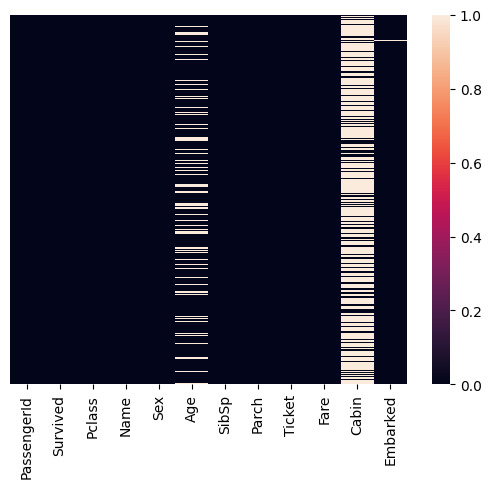

In [3]:
sns.heatmap(df.isnull(),yticklabels = False)

<Axes: xlabel='Survived', ylabel='count'>

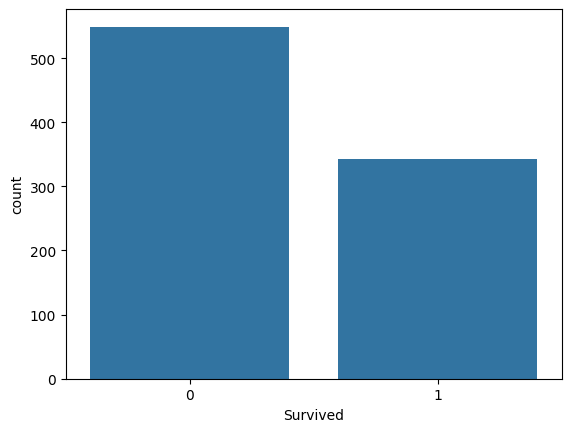

In [4]:
sns.countplot(x='Survived',data = df)

<Axes: xlabel='Survived', ylabel='count'>

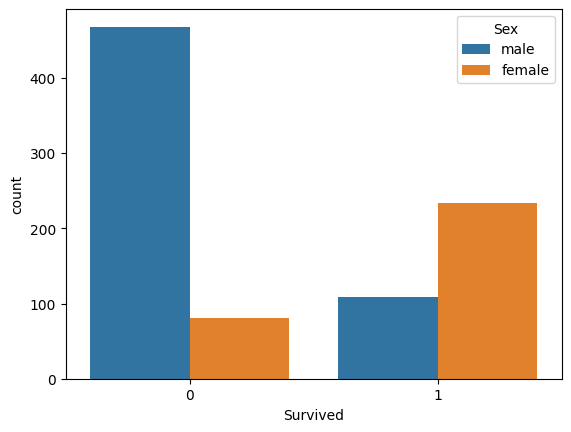

In [5]:
sns.countplot(x='Survived',data = df,hue='Sex')

<Axes: xlabel='Survived', ylabel='count'>

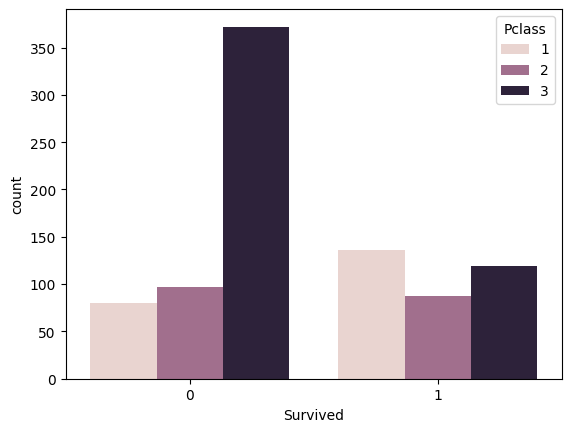

In [6]:
sns.countplot(x='Survived',data = df,hue='Pclass')

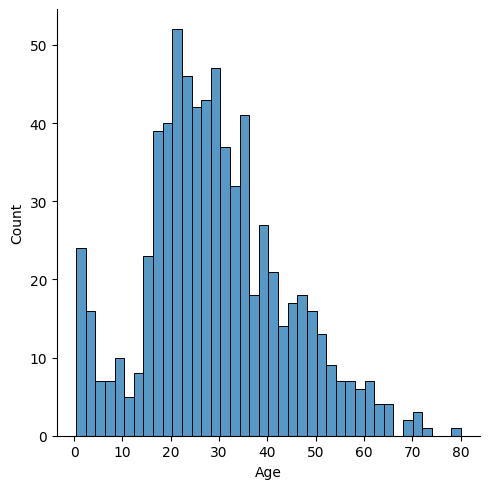

In [7]:
sns.displot(data=df['Age'].dropna(),bins=40)

<Axes: xlabel='SibSp', ylabel='count'>

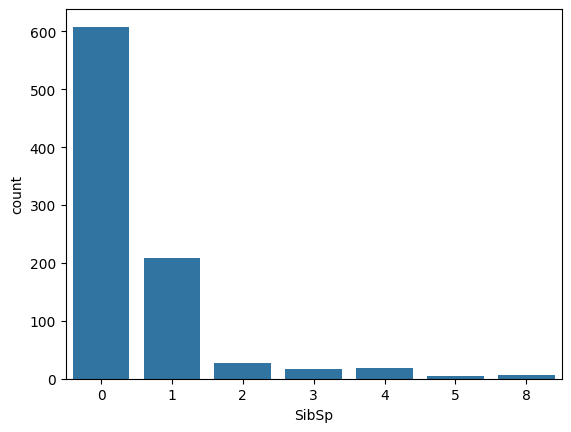

In [8]:
sns.countplot(x='SibSp',data=df)

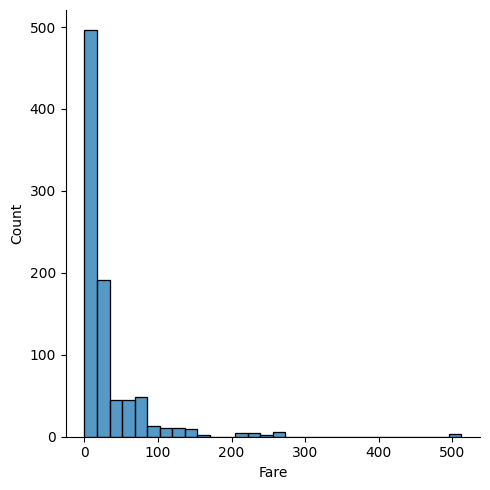

In [9]:
sns.displot(data=df['Fare'],bins=30)

<Axes: >

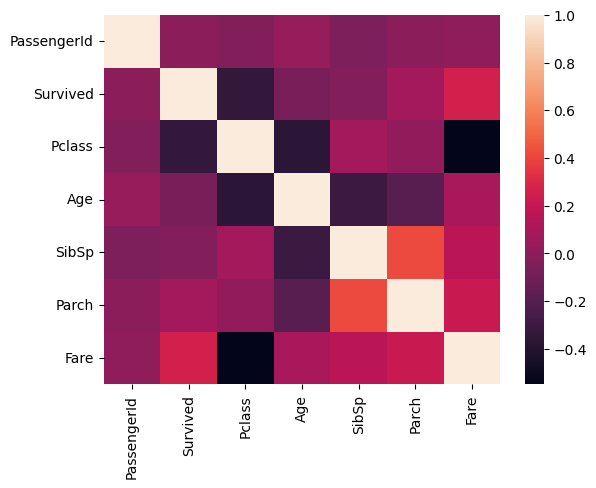

In [10]:
correlation = df.corr(numeric_only=True)
sns.heatmap(data=correlation)

<Axes: xlabel='Pclass', ylabel='Age'>

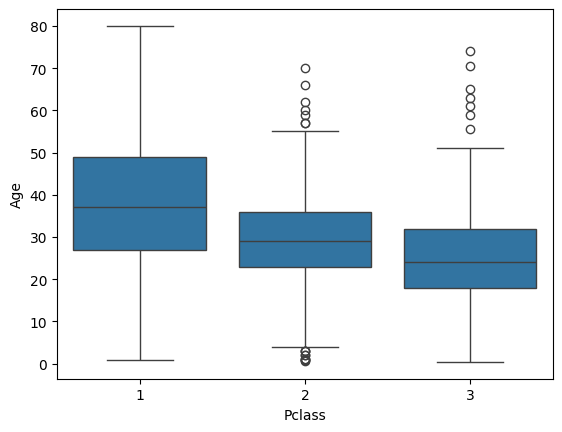

In [11]:
sns.boxplot(data=df,x='Pclass',y='Age')

In [12]:
def age_fill(col):
    age = col[0]
    Pclass = col[1]

    if pd.isnull(age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        elif Pclass == 3:
            return 24
    else:
        return age

In [13]:
df['Age'] = df[['Age','Pclass']].apply(age_fill,axis=1)

C:\Users\raghu\AppData\Local\Temp\ipykernel_26408\1082047780.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  age = col[0]
C:\Users\raghu\AppData\Local\Temp\ipykernel_26408\1082047780.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Pclass = col[1]


<Axes: >

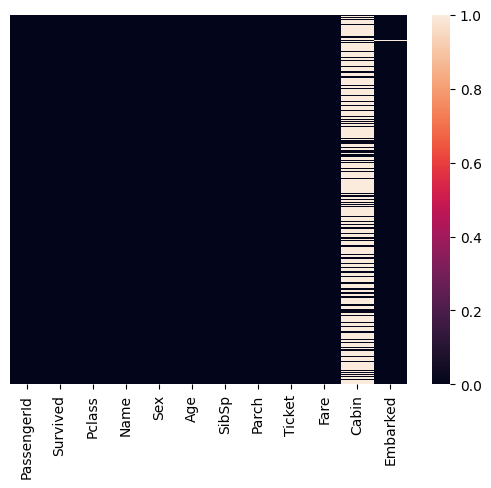

In [14]:
sns.heatmap(df.isnull(),yticklabels = False)

In [15]:
df.drop('Cabin',axis=1,inplace=True)

In [16]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [21]:
sex = pd.get_dummies(data=df['Sex'],drop_first=True)
embark = pd.get_dummies(data=df['Embarked'],drop_first=True)

df.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [27]:
df = pd.concat([df,sex,embark],axis=1)
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,True,False,True
1,2,1,1,38.0,1,0,71.2833,False,False,False
2,3,1,3,26.0,0,0,7.9250,False,False,True
3,4,1,1,35.0,1,0,53.1000,False,False,True
4,5,0,3,35.0,0,0,8.0500,True,False,True


In [29]:
df.drop('Survived',axis=1).head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,3,22.0,1,0,7.2500,True,False,True
1,2,1,38.0,1,0,71.2833,False,False,False
2,3,3,26.0,0,0,7.9250,False,False,True
3,4,1,35.0,1,0,53.1000,False,False,True
4,5,3,35.0,0,0,8.0500,True,False,True


In [30]:
df['Survived'].head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
x_train, x_test, y_train, y_test = train_test_split(df.drop('Survived',axis=1),df['Survived'],test_size=0.30,random_state=101)

In [33]:
from sklearn.linear_model import LogisticRegression

In [35]:
model = LogisticRegression(max_iter=1000).fit(x_train,y_train)

In [36]:
prediction = model.predict(x_test)

In [37]:
from sklearn.metrics import confusion_matrix

In [39]:
accuracy = confusion_matrix(y_test,prediction)
accuracy

array([[134,  20],
       [ 37,  77]])

In [40]:
from sklearn.metrics import accuracy_score

In [41]:
score = accuracy_score(y_test,prediction)
score

0.7873134328358209